In [251]:
import numpy as np
import pandas as pd
import re
from matplotlib import pyplot as plt

pd.options.mode.chained_assignment = None

In [252]:
df = pd.read_csv('games.csv')
df = df.rename(columns={'Name':'name', 'Platform' : 'platform', 'Year_of_Release' : 'year_of_release', 'Genre' : 'genre', 'NA_sales' : 'na_sales', 'EU_sales' : 'eu_sales',
 'JP_sales' : 'jp_sales', 'Other_sales' : 'other_sales', 'Critic_Score' : 'critic_score', 'User_Score' : 'user_score', 'Rating' : 'rating'})
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [253]:
median = df.year_of_release.median()
df.year_of_release = df.year_of_release.fillna(median) # меняем на медиальное значение там где его не было.
df.year_of_release = df.year_of_release.astype(int) # Меняем на int, для удаления дробной части в годах.

In [254]:
df = df.dropna(subset=['name','genre']) # удалили строчки, где не было название игры.
df.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

In [255]:
df['L'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,L
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


In [256]:
unique_years = df.year_of_release.value_counts(0)
unique_years

year_of_release
2007    1466
2008    1427
2009    1426
2010    1255
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: count, dtype: int64

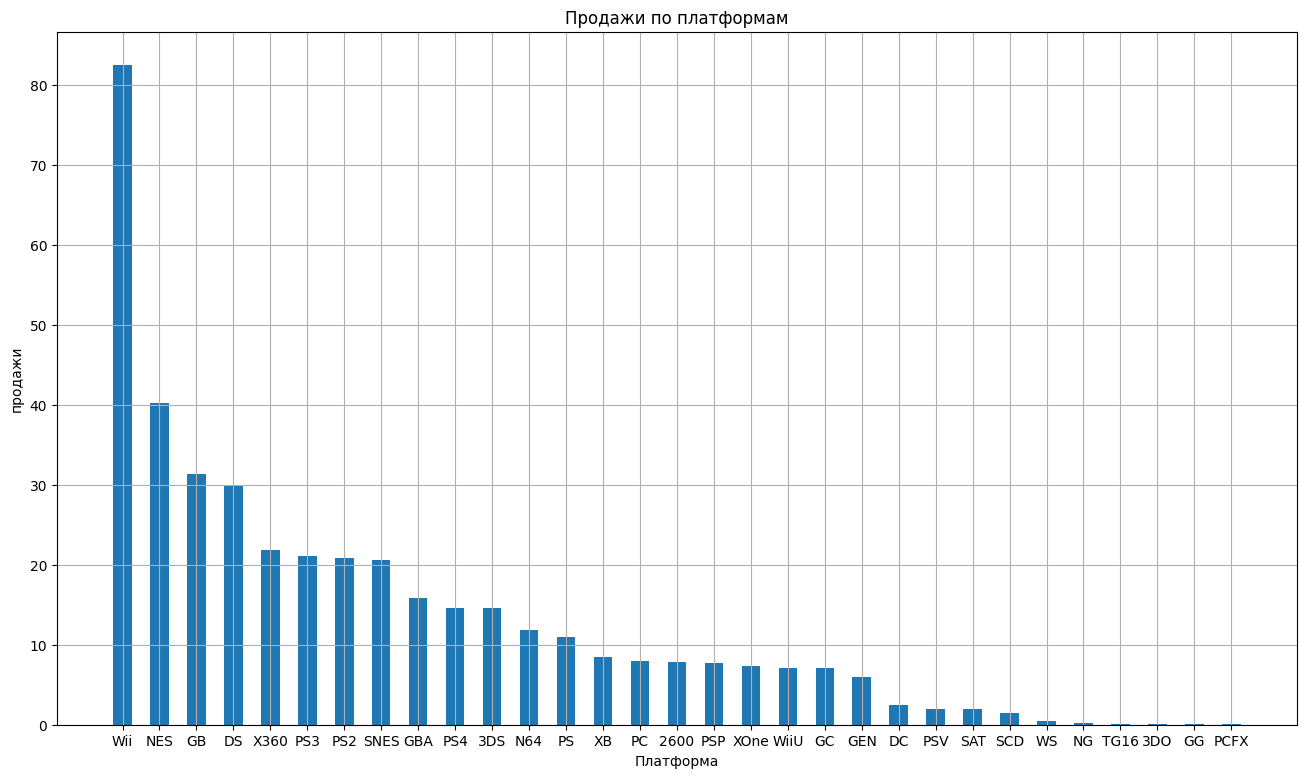

In [260]:
X = df.platform
Y = df.L
fig, ax = plt.subplots(figsize=(16,9))

plt.bar(X,Y, width=0.5)
plt.xlabel('Платформа')
plt.ylabel('продажи')
plt.title('Продажи по платформам')
plt.grid()
plt.show()

,platform,L
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86
6,GBA,317.85
7,PS4,314.14
8,PSP,294.05
9,PC,259.52


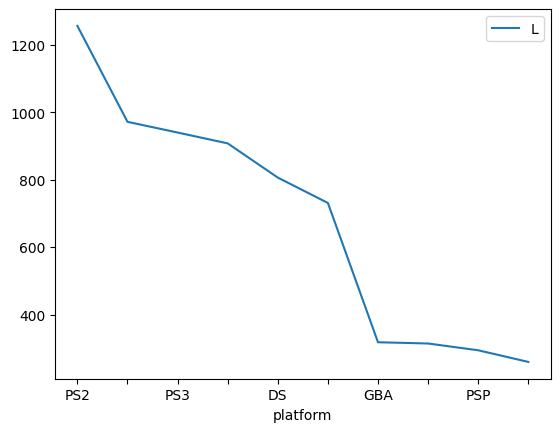

In [258]:
pasd = df.pivot_table(index=['platform'], values=['L'], aggfunc='sum').sort_values('L', ascending = False)
pasd = pasd.reset_index()
pasd = pasd.head(10)
plot = pasd.plot(x = 'platform', y = 'L')
plt.xticks(np.arange(0, 10))
pasd



In [269]:
total_platformna = df.pivot_table(index='platform',values='',aggfunc='sum').sort_values('L',ascending=False)
total_platformna=total_platformna.reset_index()
total_platformna=total_platformna.head(5)
total_platformna


,platform,L
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12


In [274]:
total_platformeu = df.pivot_table(index='platform',values='eu_sales',aggfunc='sum').sort_values('eu_sales',ascending=False)
total_platformeu=total_platformeu.reset_index()
total_platformeu=total_platformeu.head(5)
total_platformeu

,platform,eu_sales
0,PS2,339.29
1,PS3,330.29
2,X360,270.76
3,Wii,262.21
4,PS,213.61


In [276]:
total_platformna = df.pivot_table(index='platform',values='jp_sales',aggfunc='sum').sort_values('jp_sales',ascending=False)
total_platformna=total_platformna.reset_index()
total_platformna=total_platformna.head(5)
total_platformna

,platform,jp_sales
0,DS,175.57
1,PS,139.82
2,PS2,139.20
3,SNES,116.55
4,3DS,100.67
